In [17]:
import pandas as pd
from IPython.display import HTML
from mplsoccer.pitch import Pitch

In [18]:
tracking = pd.read_csv(r'C:\Users\Home\Documents\check1.csv')
tracking = tracking.reset_index(drop=True)

In [19]:
flag_0 = flag_1 = True
t0_x = t0_y = t1_x = t1_y = pd.Series(dtype=float)

In [20]:
def animate_shot(starting_frame, ending_frame, SOU_team):
    ##### Animate the Section to Understand 
    from matplotlib import animation
    from mplsoccer.pitch import Pitch
    import matplotlib.pyplot as plt

    # Set up formatting for the movie files
    import matplotlib.animation as animation
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

    global t0_x, t0_y, t1_x, t1_y, flag_0, flag_1
    
    frames_to_animate = list(range(starting_frame, ending_frame))

    pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1), figsize=(10.8, 7.2),
                  pitch_width=105,pitch_length=68,stripe=False,goal_type='box', axis=True, label=True)
    fig, ax = pitch.draw()

    ball, = ax.plot([], [], 'ko', ms=20,markerfacecolor='black',alpha=0.7, zorder=3)
    team_0, = ax.plot([], [], 'ko', ms=14,markerfacecolor='blue',alpha=0.7) 
    team_1, = ax.plot([], [], 'ko', ms=14,markerfacecolor='red',alpha=0.7)
    
    # initialization function: plot the background of each frame
    def init():
        ball.set_data([], [])
        team_0.set_data([], [])
        team_1.set_data([], [])
        return ball, team_0, team_1
    
    annotations = []
    arrows = []
    # animation function of dataframes' list

    
    def animate(i): 
        global t0_x, t0_y, t1_x, t1_y, flag_0, flag_1

        frame_ = tracking[tracking['frameIdx'] == frames_to_animate[i]]
        ball_ = frame_[frame_['playerId'] == '00000'].reset_index()
        # ball_ = frame_[frame_['playerId'] == 'BALL'].reset_index()
        
        team0_ = frame_[frame_['Team_Name'] != 'SOU '].reset_index()
        number0_ = frame_[frame_['Team_Name'] != 'SOU '].reset_index()[['number']]
        
        team1_ = frame_[frame_['Team_Name'] == 'SOU '].reset_index()
        number1_ = frame_[frame_['Team_Name'] == 'SOU '].reset_index()[['number']]
        
        number0_.number = number0_.number.apply(lambda x: int(x))
        number1_.number = number1_.number.apply(lambda x: int(x))
        
        # set the ball data with the x and y positions for the ith frame
        #ball.set_data(ball_.ball_x1, ball_.ball_y1)
        
        # set the player data using the frame id
        team_0.set_data(team0_.x1,team0_.y1)
        team_1.set_data(team1_.x1,team1_.y1)
        
        for i, a in enumerate(annotations):
            a.remove()
        annotations[:] = []
        for i, a in enumerate(arrows):
            a.remove()
        
        arrows[:] = []
        
        # update for team 0
        for k in range(len(team0_)):
            try:
                annot1 = pitch.annotate(number0_.number[k], (team0_.x1[k], team0_.y1[k]), va='center',
                              ha='center', color='white', fontsize=9, ax=ax)
                annotations.append(annot1)

                arr1 = pitch.arrows(team0_.x1[k], team0_.y1[k],
                                    t0_x[k] + team0_.speed[k], t0_y[k] - team0_.speed[k],                                    
                                    width=2, headwidth=10, headlength=10, color='#ad993c', ax=ax)
                arrows.append(arr1)                
            except Exception as ex:
                print(ex)
            t0_x = team0_.x1
            t0_y = team0_.y1
        
        # update for team 1
        for k in range(len(team1_)):
            try:
                annot2 = pitch.annotate(number1_.number[k], (team1_.x1[k], team1_.y1[k]), va='center',
                              ha='center', color='white', fontsize=9, ax=ax)
                annotations.append(annot2)
                arr2 = pitch.arrows(team1_.x1[k], team1_.y1[k],
                                    t1_x[k] + team1_.speed[k], t1_y[k] - team1_.speed[k],                                    
                                    width=2, headwidth=5, headlength=5, color='#ad993c', ax=ax)                    

                arrows.append(arr2)                
            except Exception as ex:
                pass
            t1_x = team1_.x1
            t1_y = team1_.y1
        
        # update for ball
        for k in range(len(ball_)):
            try:
                annot3 = pitch.annotate(0, (ball_.ball_x1[k], ball_.ball_y1[k]), va='center',
                              ha='center', color='white', fontsize=12, ax=ax)
                annotations.append(annot3)
                
            except Exception as ex:
                pass
                
        ax.set_title(str(frames_to_animate[i]))
        ax.set_xlim(-4,124)
        ax.set_ylim(-4,84)
        ax.axvline(x=40,alpha=0.1,color="beige")
        ax.axvline(x=80,alpha=0.1,color="beige")
        ax.axhline(y=12,alpha=0.1,color="beige")
        ax.axhline(y=26,alpha=0.1,color="beige")
        ax.axhline(y=54,alpha=0.1,color="beige")
        ax.axhline(y=68,alpha=0.1,color="beige")
        
        
        return ball, team_0, team_1
    
    # call the animator, animate every 300 ms
    # note that its hard to get the ffmpeg requirements right. I installed from conda-forge: see the conda.yml file
    anim = animation.FuncAnimation(fig, animate, frames=len(frames_to_animate), init_func=init, interval=25, blit=True)
    anim.save('demo.mp4', writer=writer)
    return(anim)

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\mplsoccer\pitch.py:367: UserWarning: Pitch length and widths are only used for tracab pitches and will be ignored
  warnings.warn("Pitch length and widths are only used for tracab pitches and will be ignored")
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object h

'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object h

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object h

'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'
'Pitch' object has no attribute 'arrows'


KeyboardInterrupt: 

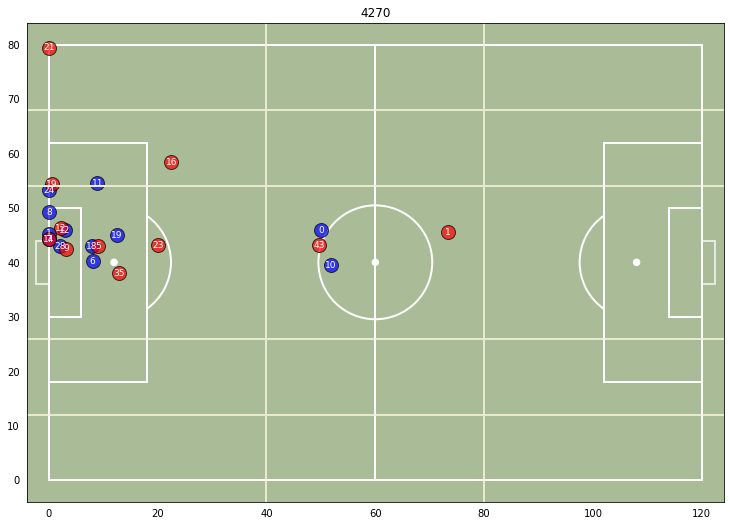

In [22]:
anim = animate_shot(4248,4273, 1).to_html5_video()
HTML(anim)